# Charnetto - Generate character networks

## 1. Load libraries

The following cells are used to import the module ´charnetto´, the desired model for the NER part if needed, the graphics parameters to show the graph output and the libraries used to save the results.

In [1]:
# change directory to get access to charnetto library
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import charnetto as cn

In [ ]:
# NER Model: Flair

from flair.models import SequenceTagger
#import spacy

en_nlp = SequenceTagger.load('ner')
#fr_nlp = SequenceTagger.load('fr-ner')
#pos_tagger = SequenceTagger.load('pos-fast')



In [ ]:
# NER Model: Spacy

#en_nlp = spacy.load("en_core_web_lg")
#fr_nlp = spacy.load("fr_core_news_lg")

In [4]:
# Graphics parameters
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] # taille de l'image dans le notebook


In [5]:
# Libraries to save results

import pandas
import json
import networkx as nx

## 2. Choose path of text

In [8]:
path = '../data/books/The Lion, the Witch, and the Wa - C.txt'

## 3. Entities extraction

### 3.1 For a book

In [10]:
lines = cn.get_lines(path)

df = cn.extract_flair_df(lines, en_nlp)
#df = cn.extract_spacy_df(lines, en_nlp)
#df = cn.unify_tags(df)
df

100%|████████████████████████████████████████████████████████████████████████████████| 860/860 [25:20<00:00,  1.77s/it]


name  start_pos  end_pos  tag     score  paragraph
0       LUCY          5        9  PER  0.996758          1
1      Peter         80       85  PER  0.997119          2
2      Susan         87       92  PER  0.988313          2
3     Edmund         94      100  PER  0.997825          2
4       Lucy        105      109  PER  0.999958          2
...      ...        ...      ...  ...       ...        ...
1537  Narnia     197696   197702  LOC  0.958676        858
1538  Narnia     197826   197832  LOC  0.981187        858
1539  Narnia     197863   197869  LOC  0.743246        858
1540  Narnia     197888   197894  LOC  0.948530        858
1541  Narnia     198529   198535  LOC  0.681419        859

[1542 rows x 6 columns]

#### 3.1.1 Gold standard

In [6]:
manual_path = path[:-4] + '_annotated' + '.txt'
man_lines = cn.get_lines(manual_path)

df = cn.extract_manual_df(man_lines)
df

name  start_pos  end_pos  tag  score  block
0             Peter         80       85  PER      1      2
1             Susan         87       92  PER      1      2
2            Edmund         94      100  PER      1      2
3              Lucy        105      109  PER      1      2
4         Professor        279      288  PER      1      2
...             ...        ...      ...  ...    ...    ...
1250           Lucy     196968   196972  PER      1    857
1251  Mrs. Macready     197098   197111  PER      1    857
1252      Professor     197365   197374  PER      1    858
1253      Professor     197439   197448  PER      1    858
1254      Professor     198462   198471  PER      1    859

[1255 rows x 6 columns]

### 3.2 For a movie

In [6]:
with open(path, "r", encoding="utf-8") as file:
    text = file.read()

df = cn.extract_movie_df(text)
df

name  start_pos  end_pos  tag  score  block
0    BOMBING LONDON        468      518  PER      1      2
1     MRS. PEVENSIE        560      612  PER      1      2
2             PETER        731      776  PER      1      2
3             SUSAN        872      917  PER      1      2
4            EDMUND       1269     1314  PER      1      2
..              ...        ...      ...  ...    ...    ...
635       PROFESSOR     102443   102492  PER      1     54
636         CREDITS     102524   102549  PER      1     54
637       PROFESSOR     102646   102694  PER      1     55
638            LUCY     102817   102887  PER      1     55
639       PROFESSOR     102934   102982  PER      1     55

[640 rows x 6 columns]

### 3.3 Save NER dataframe

In [8]:
#Uncomment desired path

flair_path = path[:-4] + '_flair.csv'
#manual_path = path[:-4] + '_manual.csv'
#movie_path = path[:-4] + '_movie.csv'

# Save df if wished

df.to_csv(flair_path)
#df.to_csv(manual_path)
#df.to_csv(movie_path)

### 3.4 Load NER dataframe

In [10]:
df = pandas.read_csv(flair_path)
#df = pandas.read_csv(manual_path)
#df = pandas.read_csv(movie_path)

## 4. List of characters

In [10]:
char_list = cn.concatenate_parents(df, min_occ = 1)
char_list

[['LUCY'],
 ['EDMUND'],
 ['SUSAN'],
 ['WHITE WITCH', 'WITCH'],
 ['MR. BEAVER', 'BEAVER'],
 ['ASLAN'],
 ['MRS. BEAVER', 'BEAVER'],
 ['PROFESSOR', 'PROF'],
 ['FOX'],
 ['MAUGRIM'],
 ['MRS. PEVENSIE'],
 ['MR. TUMNUS', 'TUMNUS'],
 ['FATHER CHRISTMAS'],
 ['DWARF'],
 ['MRS. MACREADY'],
 ['OREIUS'],
 ['WOLF'],
 ['MR.BEAVER', 'BEAVER'],
 ['*BORING*'],
 ['OTMAN'],
 ['EVERYONE'],
 ['THE CHILDREN'],
 ['HORSE'],
 ['PHILIP'],
 ['JADIS'],
 ['DRYAD'],
 ['ALL CALL OUT', 'ALL'],
 ['GINNABRICK'],
 ['RADIO-MAN'],
 ['ANNOUNCER'],
 ['BOMBING LONDON'],
 ['GRYPHON'],
 ['ORIEUS'],
 ['CROWD'],
 ['PETER READS', 'PETER'],
 ['MR BEAVER', 'BEAVER'],
 ['GUARD'],
 ['ROBIN'],
 ['GENERAL OTMIN']]

### 4.1 Save list of characters

In [11]:
# Save char_list if wished
char_path = path[:-4] + '_charlist.txt'
cn.write_charlist(char_path, char_list)

# Wait a minute:
At this point, you should go to the char_list file and clean it by hand to ensure the hierarchy is relevant.

### 4.2 Load list of characters

In [16]:
# Load cleaned file
clean_path = path[:-4] + '_cleancharlist.txt'
char_list = cn.load_char_list(clean_path)

## 5. Find cooccurrences

In [ ]:
#create alias df if needed, for network rendering
alias_df = cn.map_names(df, char_list)

In [17]:
#create pairs of cooccurrences
pairs = cn.find_pairs(df, char_list, blocks_size=5)
pairs

  0%|                                                                                          | 0/172 [00:00<?, ?it/s]C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82

 27%|█████████████████████▊                                                          | 47/172 [00:00<00:00, 469.87it/s]C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82

 59%|██████████████████████████████████████████████▊                                | 102/172 [00:00<00:00, 490.23it/s]C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82

 87%|████████████████████████████████████████████████████████████████████▍          | 149/172 [00:00<00:00, 481.56it/s]C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["alias"] = mapped_names
C:\Users\cmetrai2\anaconda3\envs\doc\Lib\site-packages\charnetto\find_pairs.py:82

100%|███████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<00:00, 483.91it/s]


[('Betty', 'Edmund'),
 ('Betty', 'Ivy'),
 ('Betty', 'Lucy'),
 ('Betty', 'Macready'),
 ('Betty', 'Margaret'),
 ('Betty', 'Peter'),
 ('Betty', 'Susan'),
 ('Edmund', 'Ivy'),
 ('Edmund', 'Lucy'),
 ('Edmund', 'Macready'),
 ('Edmund', 'Margaret'),
 ('Edmund', 'Peter'),
 ('Edmund', 'Susan'),
 ('Ivy', 'Lucy'),
 ('Ivy', 'Macready'),
 ('Ivy', 'Margaret'),
 ('Ivy', 'Peter'),
 ('Ivy', 'Susan'),
 ('Lucy', 'Macready'),
 ('Lucy', 'Margaret'),
 ('Lucy', 'Peter'),
 ('Lucy', 'Susan'),
 ('Macready', 'Margaret'),
 ('Macready', 'Peter'),
 ('Macready', 'Susan'),
 ('Margaret', 'Peter'),
 ('Margaret', 'Susan'),
 ('Peter', 'Susan'),
 ('Edmund', 'Lucy'),
 ('Edmund', 'Mother'),
 ('Edmund', 'Susan'),
 ('Lucy', 'Mother'),
 ('Lucy', 'Susan'),
 ('Mother', 'Susan'),
 ('Edmund', 'Lucy'),
 ('Edmund', 'Peter'),
 ('Lucy', 'Peter'),
 ('Edmund', 'Susan'),
 ('Lucy', 'Peter'),
 ('Lucy', 'Tumnus'),
 ('Lucy', 'Tumnus'),
 ('Adam', 'Lucy'),
 ('Adam', 'Tumnus'),
 ('Lucy', 'Tumnus'),
 ('Lucy', 'Tumnus'),
 ('Eve', 'Lucy'),
 ('Eve',

### 5.1 Save cooccurrences

In [18]:
# Save pairs if wished
pairs_path = path[:-4] + '_pairs.json'

with open(pairs_path, 'w', encoding='utf-8') as file:
     json.dump(pairs, file)

### 5.2 Load cooccurrences

In [19]:
# Load pairs
pairs_path = path[:-4] + '_pairs.json'

with open(pairs_path, 'r', encoding='utf-8') as file:
    pairs = json.load(file)

## 6. Show network

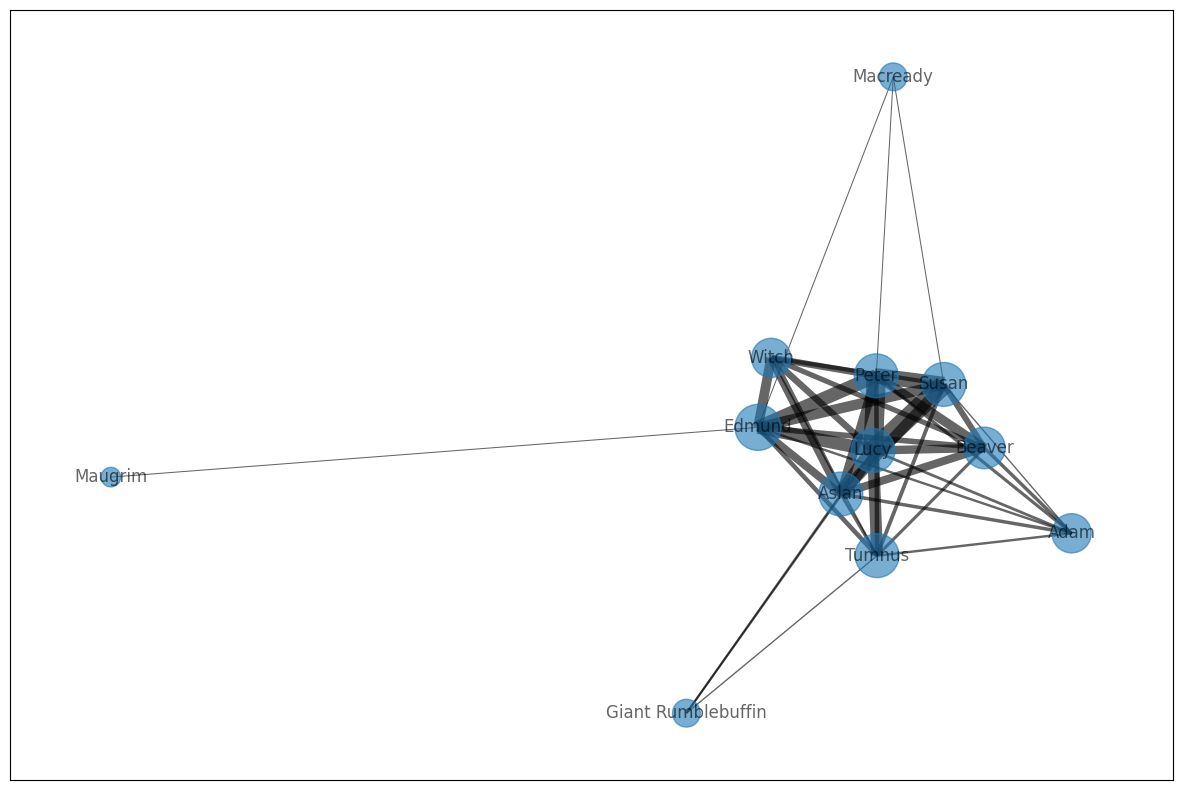

In [24]:
# Create the network
G = cn.create_charnet(pairs, min_pairs=3, alias_df = alias_df, char_list = char_list)
nx.draw_networkx(G,
                 pos=nx.spring_layout(G),
                 width = [edgedata["weight"]/4 for _, _, edgedata in G.edges(data=True)], # largeur des arêtes = nombre d'interactions
                 alpha = 0.6, # transparence
                 node_size=[(v+1) * 100 for v in dict(nx.degree(G)).values()] # taille des noeuds = nombre de connexions
                 #node_size = [nodedata["weight"]*2 for _, nodedata in G.nodes(data=True)], # taille des noeuds = nombre d'occurrences
                )

### 6.1 Save network

#### in gpickle

In [17]:
import pickle

# Gather informations about network
name = path[:-4].split('/')[-1]
media = 'movie'
min_occ = 1
blocks_size = 5
min_pairs = 3

#Save network in graphml
network_path = '../' + path[:-4].split('/')[1] + '/networks/' + f'{name}_{media}_{min_occ}_{blocks_size}_{min_pairs}.gpickle'

with open(network_path, 'wb') as f:
    pickle.dump(G, f)